In [7]:
import numpy as np
import torch

# npz 파일을 로드하는 함수
def load_npz_data(npz_file):
    data = np.load(npz_file, allow_pickle=True)
    images = data['images']
    labels = data['labels']  # 필요한 경우 레이블도 사용 가능

    return images, labels

# 예시: AAPL 종목의 20일 기간의 데이터 로드
images, labels = load_npz_data('../data/charts/train_candlestick_data.npz')

In [8]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
images.shape, labels.shape

((193922, 96, 180), (193922,))

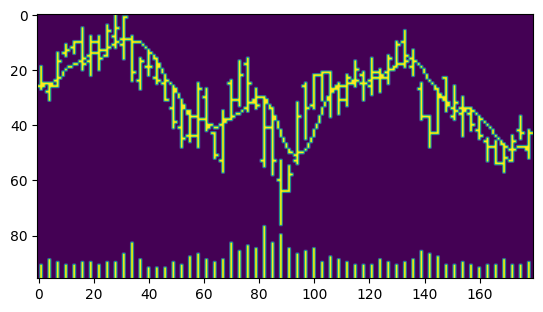

In [20]:
# 이미지 데이터를 그림으로 변환
import matplotlib.pyplot as plt

def plot_candlestick(image):
    fig, ax = plt.subplots()
    ax.imshow(image)
    plt.show()
    
plot_candlestick(images[150])